#Project 1 : Diwali Sales Data Analysis

   ## **1.1 Data Collection**

  * Importing Python libraries


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Visualizing our data
%matplotlib inline
import seaborn as sns

In [5]:
ss = pd.read_csv('/content/sample_data/Diwali Sales Data.csv', encoding='unicode_escape')

print(ss.dtypes)                                                # Checking Data Types
print("Total No. of rows & columns : ", ss.shape)               # Gives total count of rows and colums
print(f"No. of Duplicated Rows : {ss.duplicated().sum()}")      # Check Duplicates

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object
Total No. of rows & columns :  (11251, 15)
No. of Duplicated Rows : 8


# Data Exploration


In [6]:
ss.head()               # Viewing first few rows

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
ss.info()               # Viewing DataFrame Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
ss.describe(include='all')                 # Include 'all' to get statistics for non-numeric columns too

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251,11251,11251,11251,11251.000000,11251.000000,11251,11251,11251,11251,11251.000000,11239.000000,0.0,0.0
unique,NaN,1250,2351,2,7,NaN,NaN,16,5,15,18,NaN,NaN,NaN,NaN
top,NaN,Vishakha,P00265242,F,26-35,NaN,NaN,Uttar Pradesh,Central,IT Sector,Clothing & Apparel,NaN,NaN,NaN,NaN
freq,NaN,42,53,7842,4543,NaN,NaN,1946,4296,1588,2655,NaN,NaN,NaN,NaN
mean,1.003004e+06,NaN,NaN,NaN,NaN,35.421207,0.420318,NaN,NaN,NaN,NaN,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,NaN,NaN,NaN,NaN,12.754122,0.493632,NaN,NaN,NaN,NaN,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,NaN,NaN,NaN,NaN,12.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,NaN,NaN,NaN,NaN,27.000000,0.000000,NaN,NaN,NaN,NaN,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,NaN,NaN,NaN,NaN,33.000000,0.000000,NaN,NaN,NaN,NaN,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,NaN,NaN,NaN,NaN,43.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,12675.000000,NaN,NaN


In [9]:
ss.columns                # Viewing all the columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [10]:
ss.sample(5)                # View a desired sample of 5 rows

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11223,1001542,Buch,P00113642,F,18-25,20,1,Maharashtra,Western,Aviation,Office,4,574.0,NaN,NaN
934,1001680,Vasudev,P00047742,M,26-35,26,1,Gujarat,Western,Banking,Food,4,19011.0,NaN,NaN
3516,1000610,Cacioppo,P00187342,F,26-35,32,0,Maharashtra,Western,Govt,Food,4,11693.0,NaN,NaN
9040,1002178,Evan,P00226142,F,46-50,48,0,Jharkhand,Eastern,Construction,Clothing & Apparel,1,5147.0,NaN,NaN
4990,1004814,Murdock,P00222142,F,18-25,20,0,Bihar,Eastern,Chemical,Clothing & Apparel,2,8742.0,NaN,NaN


In [11]:
ss.isnull()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
11247,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
11248,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
11249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [12]:
ss.isnull().sum()           # Checking for null values

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [13]:
ss.drop(['Status','unnamed1'], axis=1, inplace=True)

In [14]:
ss.shape

(11251, 13)

In [15]:
ss.dropna(inplace=True)           # Dropping null values

In [16]:
ss.shape

(11239, 13)

In [17]:
ss.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [18]:
ss['Amount'] = ss['Amount'].astype('int')               # Change Data Type

In [19]:
ss['Amount'].dtypes

dtype('int64')

In [20]:
ss.describe()               # Returns Description of the Data in the DataFrame (i.e. count, mean, std, eetc.)

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [23]:
ss[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis (EDA)

#### GENDER

In [24]:
ss.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

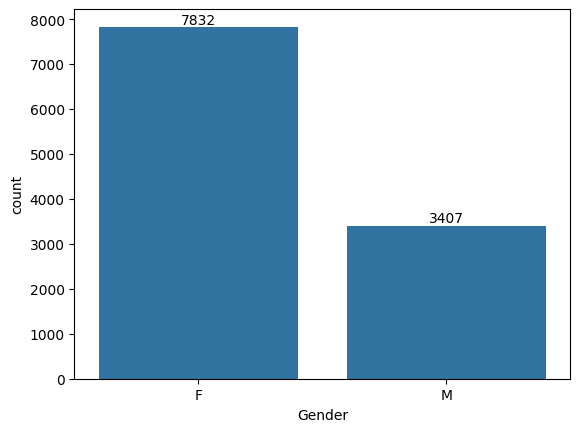

In [31]:
g = sns.countplot(x = 'Gender', data=ss)
for bars in g.containers:
  g.bar_label(bars)

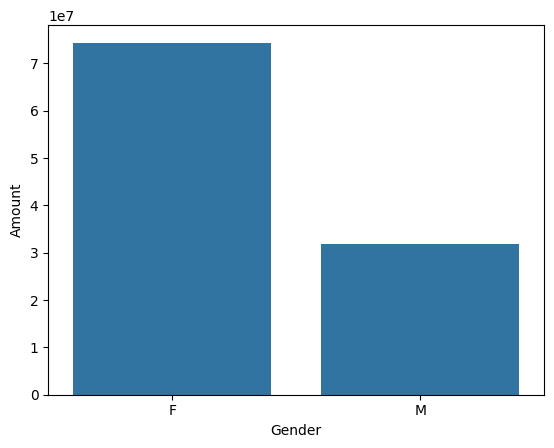

In [49]:
s_gen = ss.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sg = sns.barplot(x = 'Gender', y = 'Amount', data = s_gen)

#### From Above graphs we can see that most buyers are females and even the purchasing power of females is greater than males.

#### AGE

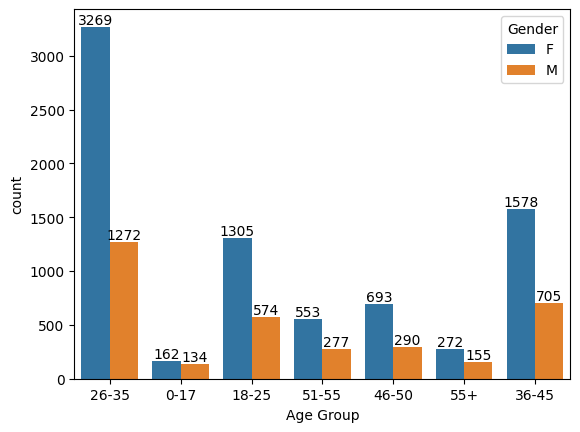

In [41]:
ag = sns.countplot(x = 'Age Group', hue = 'Gender', data=ss)
for bars in ag.containers:
  ag.bar_label(bars)

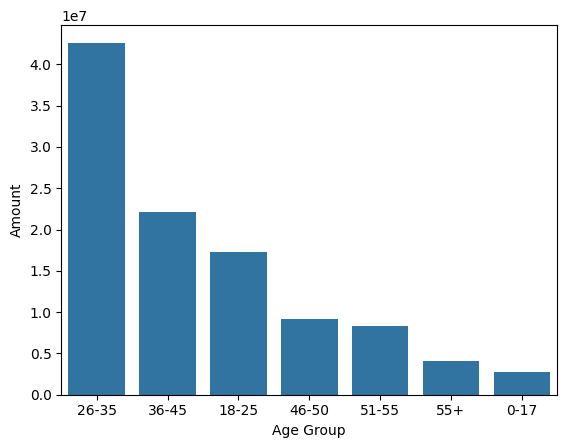

In [48]:
# Total Amount vs Age Group
s_ag = ss.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sg = sns.barplot(x = 'Age Group', y = 'Amount', data = s_gen)

#### From Above graphs we can see that most buyers are females aged between 26-35.

#### STATE

<Axes: xlabel='State', ylabel='Orders'>

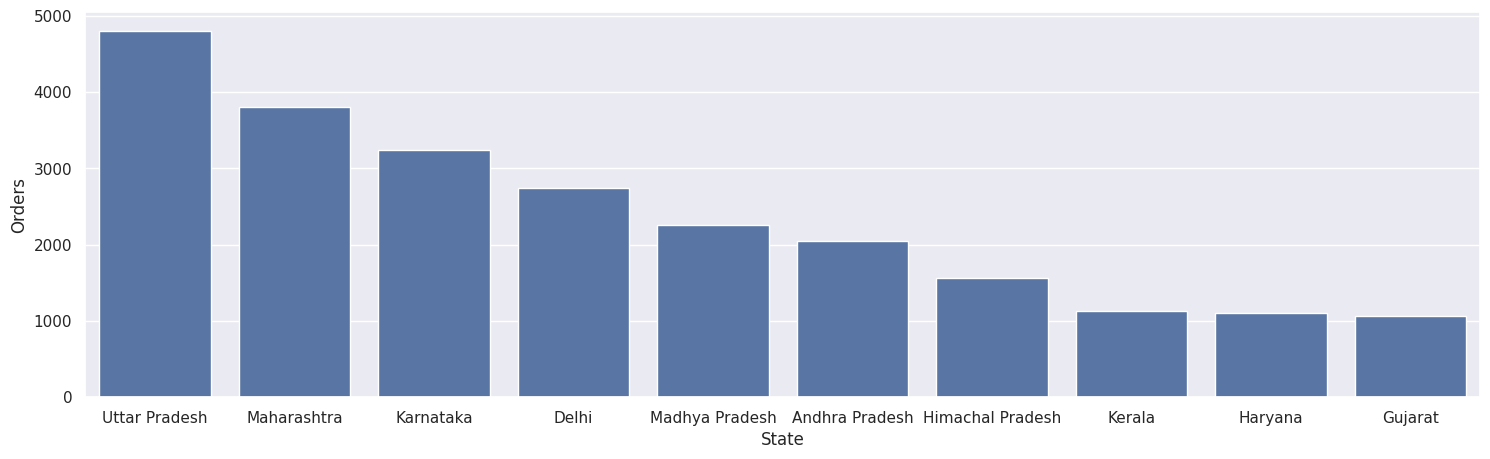

In [56]:
st = ss.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)           # Top 10 States only
sns.set(rc={'figure.figsize':(18, 5)})
sns.barplot(x = 'State', y = 'Orders', data = st)

<Axes: xlabel='State', ylabel='Amount'>

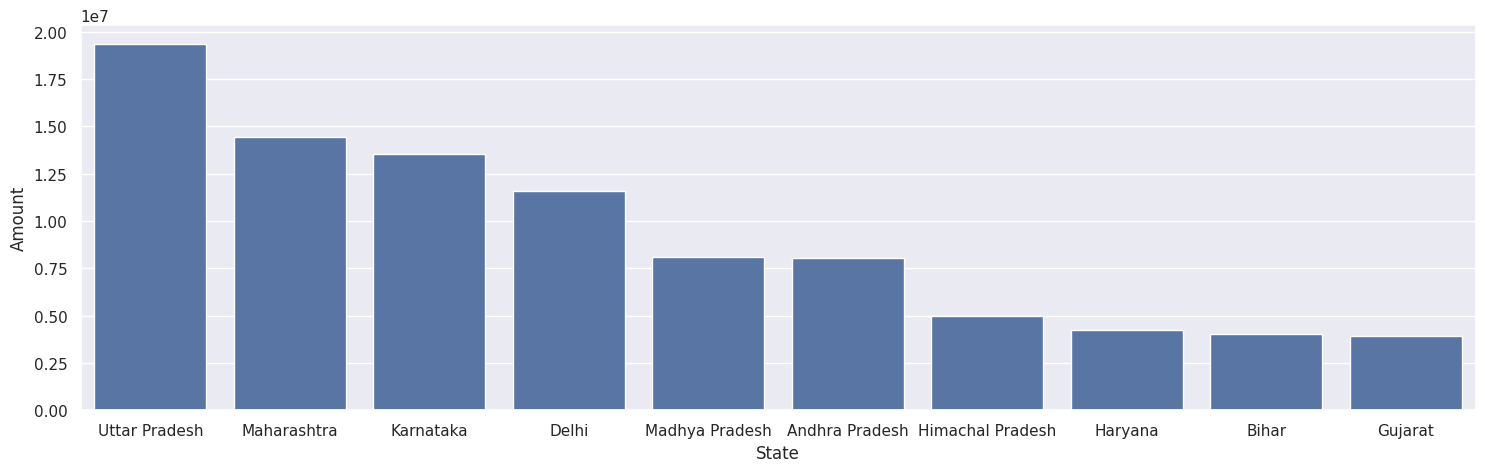

In [58]:
sst = ss.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)           # Top 10 States only
sns.set(rc={'figure.figsize':(18, 5)})
sns.barplot(x = 'State', y = 'Amount', data = sst)

#### From Above graphs we can see that most buyers are from UP, Maharashtra and Karnataka respectively.

#### MARITAL STATUS

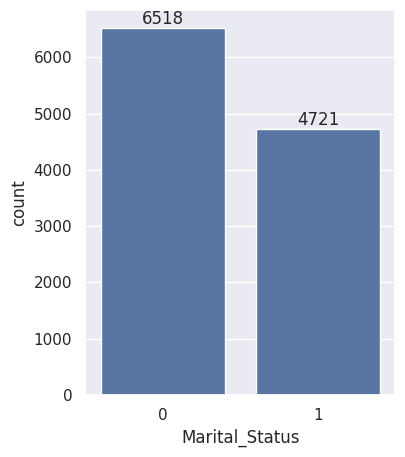

In [72]:
ms = sns.countplot(x = 'Marital_Status', data=ss)
sns.set(rc={'figure.figsize':(7, 5)})
for bars in ms.containers:
  ms.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

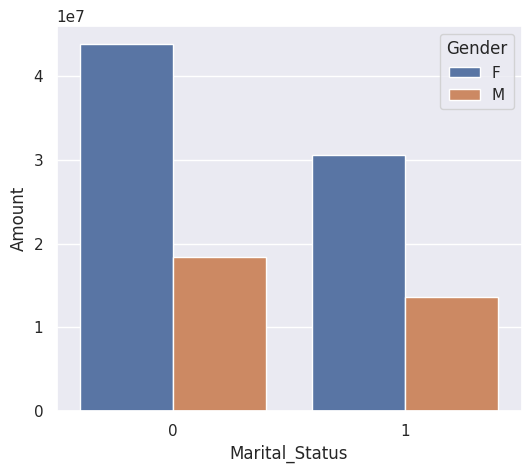

In [73]:
sms = ss.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6, 5)})
sns.barplot(x = 'Marital_Status', y = 'Amount', hue='Gender', data = sms)

#### From above graph we can see that most of the buyers are married females (women) and they have high purchasing power as compared to men.

#### OCCUPATION

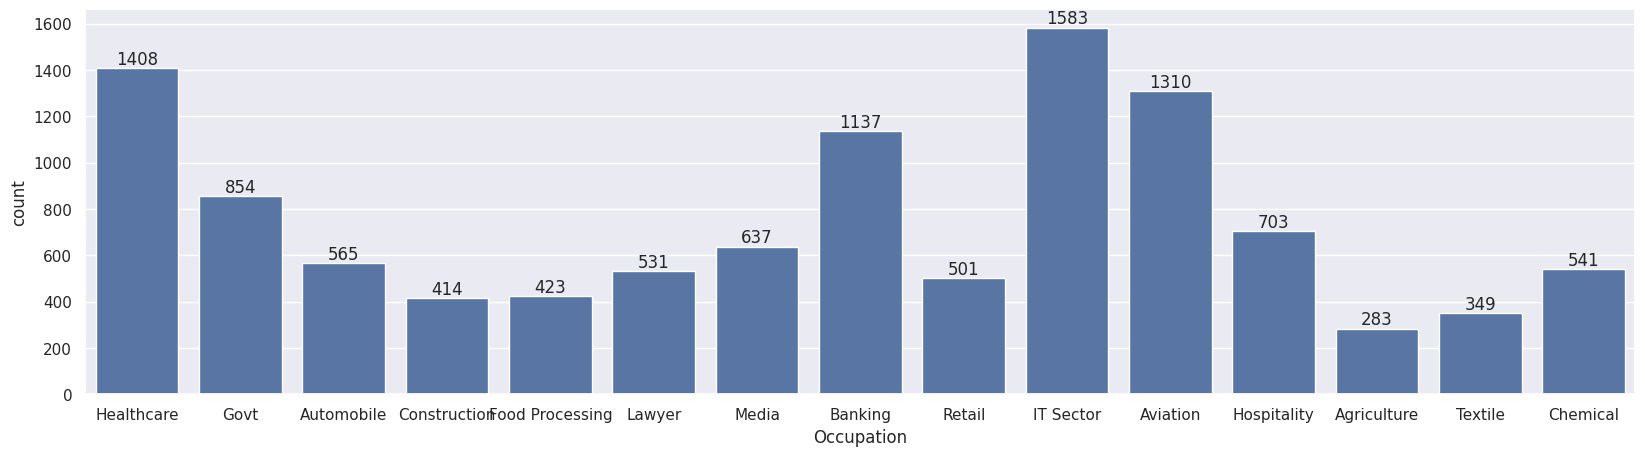

In [74]:
sns.set(rc={'figure.figsize':(20, 5)})
oc = sns.countplot(x = 'Occupation', data=ss)

for bars in oc.containers:
  oc.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

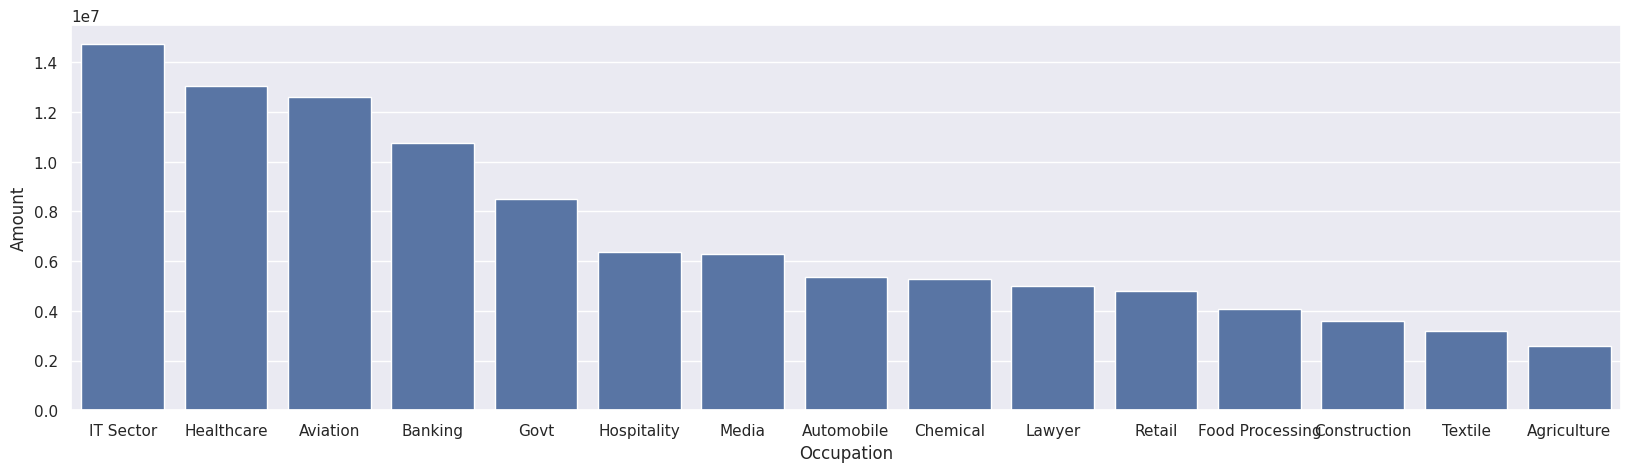

In [75]:
soc = ss.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20, 5)})
sns.barplot(x = 'Occupation', y = 'Amount', data = soc)

#### From above graphs we can see that most of the buyers are working in IT, Healthcare and Avation sector.

#### PRODUCT CATEGORY

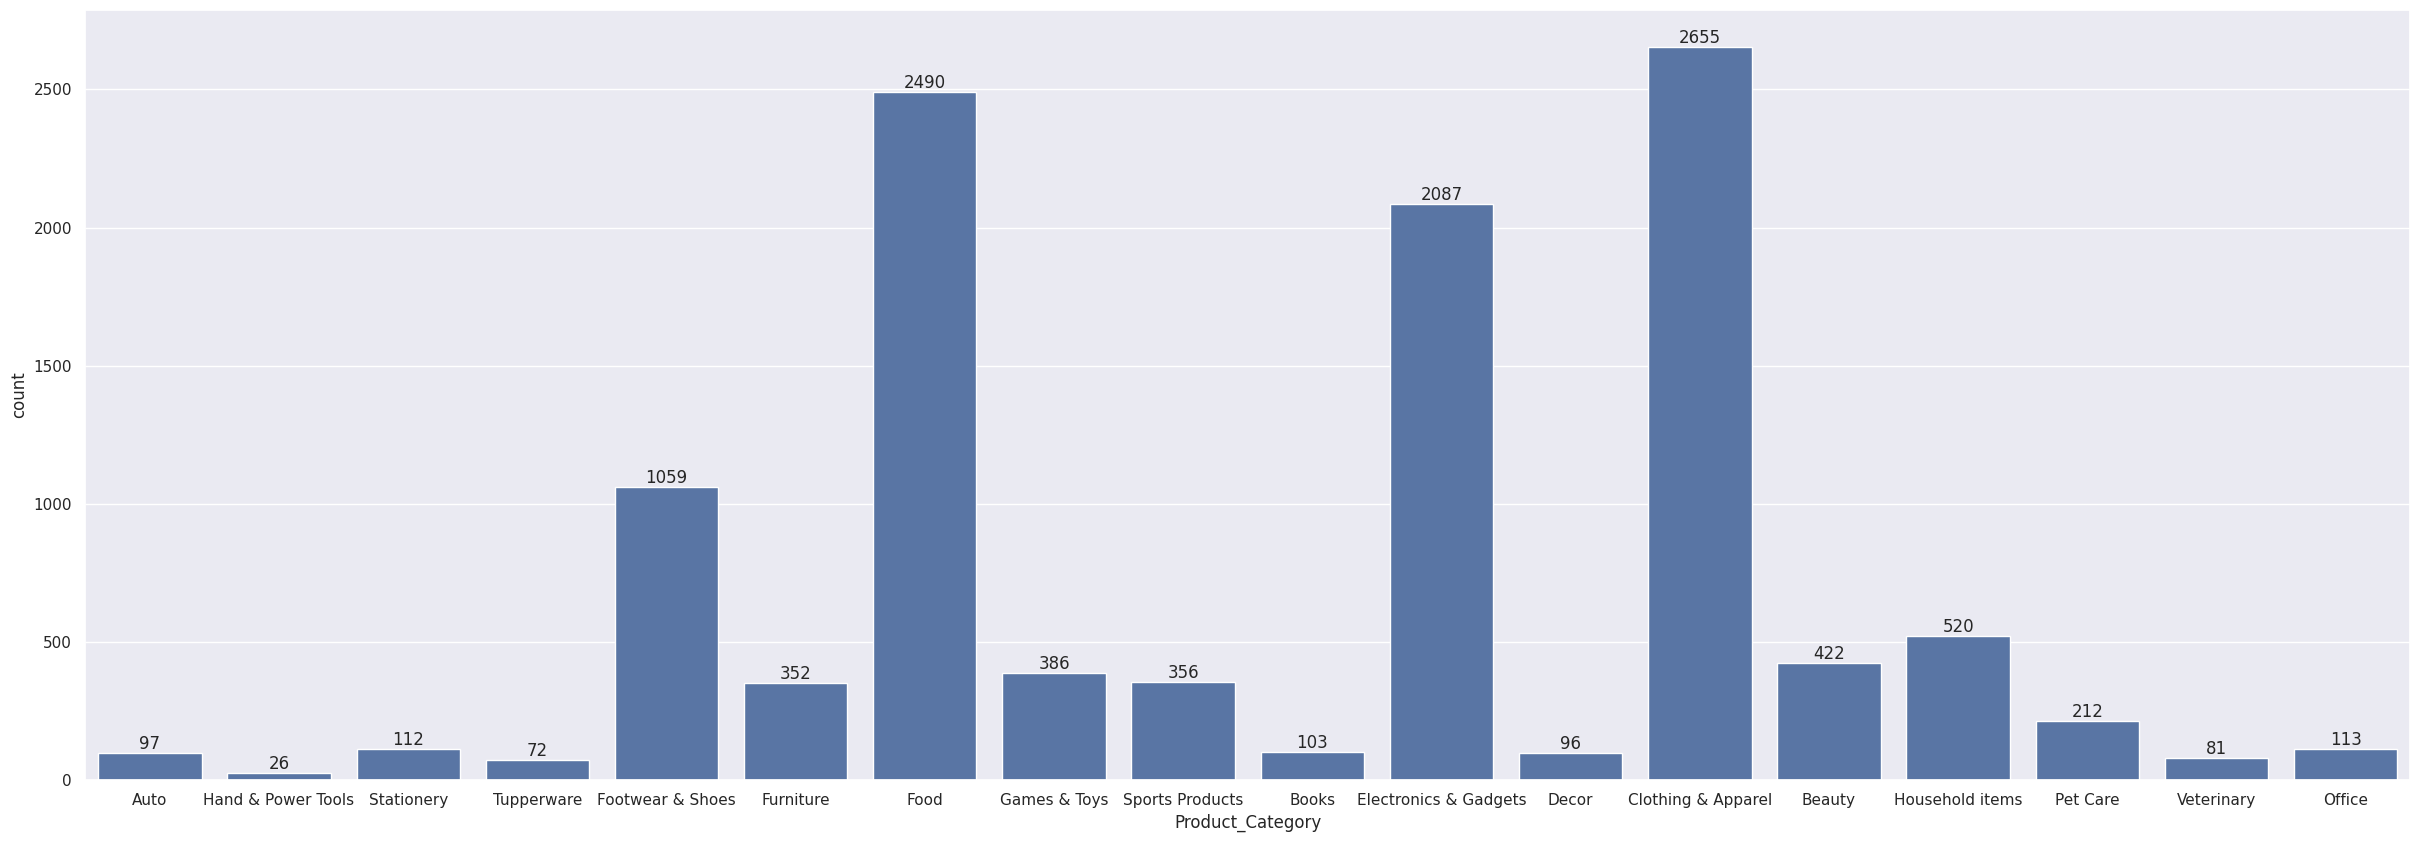

In [82]:
sns.set(rc={'figure.figsize':(30, 10)})
pc = sns.countplot(x = 'Product_Category', data=ss)

for bars in pc.containers:
  pc.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

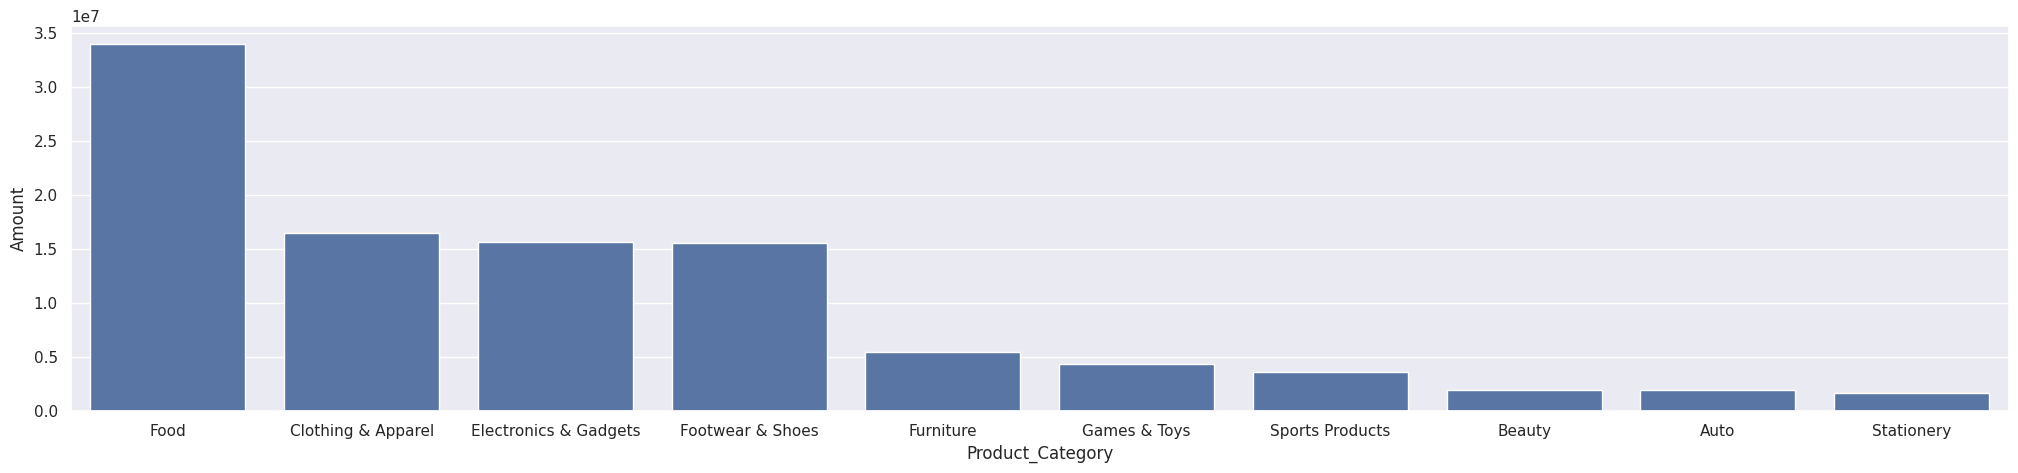

In [96]:
spc = ss.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(25, 5)})
sns.barplot(x = 'Product_Category', y = 'Amount', data = spc)

#### From above graphs we can see that most of the sold products are from Food, Clothing and Electronics Industry.

<Axes: xlabel='Product_ID', ylabel='Orders'>

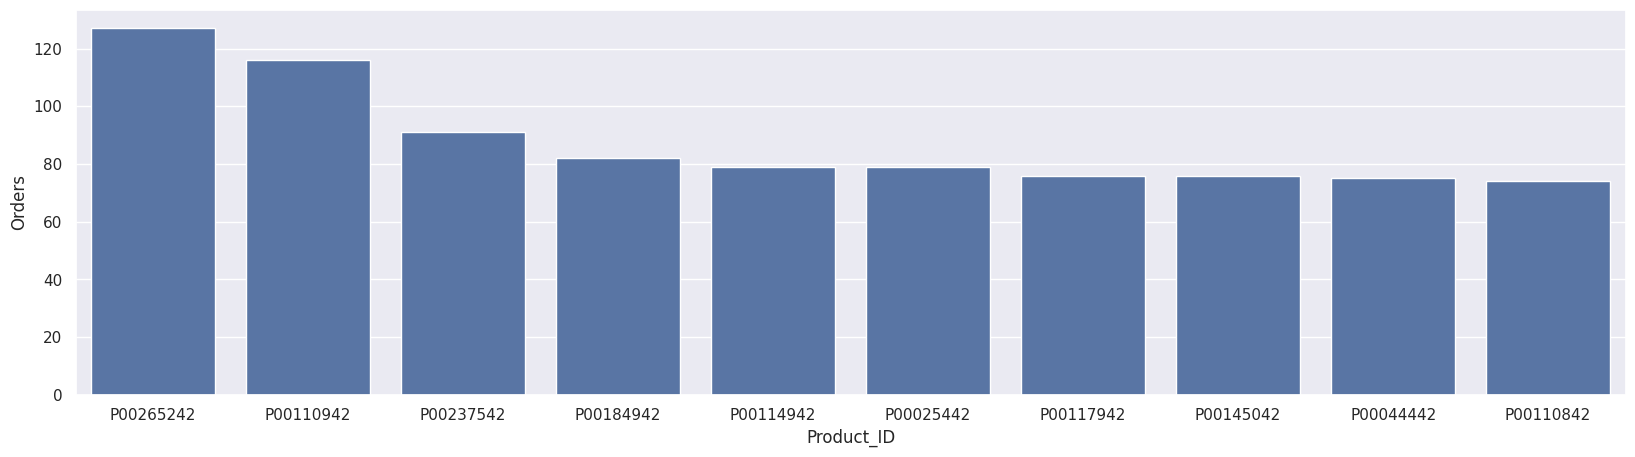

In [97]:
sst = ss.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20, 5)})
sns.barplot(x = 'Product_ID', y = 'Orders', data = sst)

# CONCLUSION

*   Married women in age group 26-35yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation industries are more likely to buy products from food, clothing and electronics category.

